In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('train_Human_Activity_Recognition_with_Smartphones.csv').drop(columns='subject')

train_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,WALKING_UPSTAIRS


In [3]:
train_df.shape

(7352, 562)

In [4]:
train_df['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [5]:
train_df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

In [6]:
test_df = pd.read_csv('test_Human_Activity_Recognition_with_Smartphones.csv').drop(columns='subject')
test_df.shape

(2947, 562)

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate feature and target
X = train_df.drop('Activity', axis=1)
y = train_df['Activity']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(5881, 561)
(1471, 561)


## Applying Logistic Regression

In [8]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

baseline_log_reg_score = accuracy_score(y_test, y_pred)
baseline_log_reg_score

0.9809653297076818

### 1. Remove Duplicate Columns

In [9]:
def get_duplicate_columns(df):
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [10]:
duplicated_columns = get_duplicate_columns(X_train)
duplicated_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [11]:
len(X_train['tBodyAccMag-mean()'])

5881

In [12]:
(X_train['tBodyAccMag-mean()'] == X_train['tBodyAccMag-sma()']).sum()

5881

In [13]:
X_train[['tBodyAccMag-mean()', 'tBodyAccMag-sma()', 'tGravityAccMag-mean()', 'tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
57,-0.997420,-0.997420,-0.997420,-0.997420
4154,-0.133797,-0.133797,-0.133797,-0.133797
6945,0.130528,0.130528,0.130528,0.130528
527,-0.955222,-0.955222,-0.955222,-0.955222
4196,-0.992499,-0.992499,-0.992499,-0.992499
...,...,...,...,...
5191,-0.372758,-0.372758,-0.372758,-0.372758
5226,-0.256033,-0.256033,-0.256033,-0.256033
5390,-0.434138,-0.434138,-0.434138,-0.434138
860,-0.983969,-0.983969,-0.983969,-0.983969


In [14]:
for one_list in duplicated_columns.values():
    X_train.drop(columns=one_list, inplace=True)
    X_test.drop(columns=one_list, inplace=True)

In [15]:
X_train.shape

(5881, 540)

## 2. Variance Threshold

In [16]:
# Threshold value guideline
# Make sure all the columns are on the same scale, standardize or normalize
# When on the same scale, value can be set between 0.1 to 0.01 

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.05)

sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [17]:
# Columns which are more than threshold value
sum(sel.get_support())

349

In [18]:
# All those columns 
columns = X_train.columns[sel.get_support()]
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=349)

In [19]:
# transform will delete all those columns who are below the threshold 
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [20]:
print(X_train.shape)
print(X_test.shape)

(5881, 349)
(1471, 349)


In [21]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.994939,-0.993994,-0.995450,-0.938974,-0.577031,-0.813863,0.846922,...,0.394506,-0.684497,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.343326,0.039623,-0.256327,-0.310961,0.085617,-0.411806,0.271334,...,0.052089,-0.131946,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,-0.118256,-0.030279,0.432861,0.370607,-0.072309,0.200747,0.118277,...,-0.038923,-0.643660,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.984417,-0.901405,-0.965788,-0.922291,-0.524676,-0.807362,0.825370,...,-0.145084,-0.326860,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,-0.564033,-0.810993,0.853330,...,0.096524,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577


## 3. Correlation

In [22]:
# We are applying brute force approach where we are finding the corr of every feature with all other features
# If it is more than 0.95, then keep only one col and drop the rest

<Axes: >

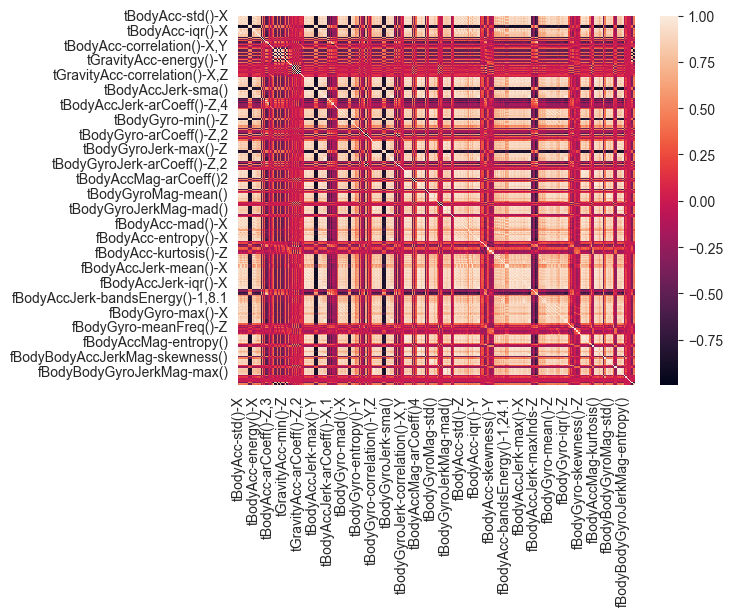

In [23]:
import seaborn as sns

# Dark regions are all high positive corr
sns.heatmap(X_train.corr())

In [24]:
corr_matrix = X_train.corr()
corr_matrix

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-std()-X,1.000000,0.927247,0.850268,0.998631,0.920936,0.845200,0.981284,0.893743,0.843918,-0.966714,...,-0.061190,0.152159,0.118286,-0.042353,-0.027089,0.023914,-0.035176,-0.374114,0.472605,0.393209
tBodyAcc-std()-Y,0.927247,1.000000,0.895065,0.922627,0.997384,0.894128,0.917831,0.953852,0.882782,-0.937472,...,-0.103492,0.210313,0.179834,-0.023759,-0.012484,-0.002241,-0.028881,-0.383095,0.524945,0.432180
tBodyAcc-std()-Z,0.850268,0.895065,1.000000,0.842986,0.890973,0.997414,0.852711,0.864716,0.936311,-0.861033,...,-0.095347,0.157032,0.124579,-0.009647,-0.020843,-0.010535,-0.016002,-0.344114,0.475241,0.480824
tBodyAcc-mad()-X,0.998631,0.922627,0.842986,1.000000,0.916201,0.838010,0.973704,0.888702,0.838024,-0.962447,...,-0.055098,0.153494,0.120750,-0.049949,-0.026887,0.024098,-0.035629,-0.370629,0.467965,0.389139
tBodyAcc-mad()-Y,0.920936,0.997384,0.890973,0.916201,1.000000,0.890707,0.911283,0.950131,0.877793,-0.932521,...,-0.101235,0.205346,0.175966,-0.027747,-0.011823,-0.005865,-0.026679,-0.379578,0.526803,0.430548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.023914,-0.002241,-0.010535,0.024098,-0.005865,-0.014838,0.029230,-0.000207,-0.023622,-0.008700,...,-0.024274,0.031310,0.021829,-0.006297,0.013870,1.000000,-0.104987,-0.009878,-0.006218,-0.011178
"angle(tBodyGyroJerkMean,gravityMean)",-0.035176,-0.028881,-0.016002,-0.035629,-0.026679,-0.016949,-0.038935,-0.013144,-0.011510,0.030630,...,-0.000472,-0.030566,-0.028829,-0.025656,0.030850,-0.104987,1.000000,0.027310,-0.009582,-0.009311
"angle(X,gravityMean)",-0.374114,-0.383095,-0.344114,-0.370629,-0.379578,-0.346350,-0.386159,-0.373556,-0.345776,0.365571,...,0.077000,-0.086273,-0.081381,0.012546,0.022038,-0.009878,0.027310,1.000000,-0.784098,-0.642642
"angle(Y,gravityMean)",0.472605,0.524945,0.475241,0.467965,0.526803,0.476498,0.482312,0.489971,0.462052,-0.471464,...,-0.093215,0.086150,0.078420,-0.003872,-0.005159,-0.006218,-0.009582,-0.784098,1.000000,0.596205


In [25]:
# Get the column names of the Dataframe
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the Dataframe
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

# Repetitive cols
print(len(columns_to_drop))

1508


In [26]:
columns_to_drop

['tBodyAcc-mad()-X',
 'tBodyAcc-max()-X',
 'tBodyAcc-sma()',
 'tBodyAcc-iqr()-X',
 'tBodyAccJerk-std()-X',
 'tBodyAccJerk-mad()-X',
 'tBodyAccJerk-sma()',
 'tBodyAccJerk-iqr()-X',
 'tBodyAccMag-mean()',
 'tBodyAccMag-std()',
 'tBodyAccMag-mad()',
 'tBodyAccMag-max()',
 'tBodyAccMag-energy()',
 'tBodyAccJerkMag-mean()',
 'tBodyAccJerkMag-std()',
 'tBodyAccJerkMag-mad()',
 'fBodyAcc-mean()-X',
 'fBodyAcc-std()-X',
 'fBodyAcc-mad()-X',
 'fBodyAcc-max()-X',
 'fBodyAcc-sma()',
 'fBodyAccJerk-mean()-X',
 'fBodyAccJerk-std()-X',
 'fBodyAccJerk-mad()-X',
 'fBodyAccJerk-max()-X',
 'fBodyAccJerk-sma()',
 'fBodyAccMag-mean()',
 'fBodyAccMag-std()',
 'fBodyAccMag-mad()',
 'fBodyBodyAccJerkMag-mean()',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-max()-Y',
 'tBodyAcc-sma()',
 'tBodyAcc-iqr()-Y',
 'tBodyAccJerk-std()-Y',
 'tBodyAccJerk-mad()-Y',
 'tBodyAccJerk-iqr()-Y',
 'tBodyGyro-sma()',
 'tBodyAccMag-mean()',
 'tBodyAccJerkMag-entropy()',
 'tBodyGyroMag-mean()',
 'fBodyAcc-mean()-Y',
 'fBodyAcc-std()-Y',
 'fB

In [27]:
columns_to_drop = set(columns_to_drop)
len(columns_to_drop)

197

In [28]:
X_train.drop(columns=columns_to_drop, axis=1, inplace=True)
X_test.drop(columns=columns_to_drop, axis=1, inplace=True)

In [29]:
X_train.shape[1]

152

In [30]:
# We started of from 561 
# Removed Duplicate, and we got 541 remaining
# Applied Variance Threshold, and we got 349 remaining
# Applied Corr, and we are left with 152

## 4. ANOVA

In [31]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)

# Display selected feature names
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [32]:
columns = X_train.columns[sel.get_support()]

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


## Moment of Truth

In [33]:
# Initialize and train logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy_ = accuracy_score(y_test, y_pred)
print(accuracy_)

0.9687287559483345


## 5. Chi-Square test

In [34]:
titanic = pd.read_csv('titanic_train.csv')[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']]
titanic

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0
...,...,...,...,...,...,...
886,2,male,0,0,S,0
887,1,female,0,0,S,1
888,3,female,1,2,S,0
889,1,male,0,0,C,1


In [35]:
cross_tab = pd.crosstab(titanic['Survived'], titanic['Sex'])
cross_tab

Sex,female,male
Survived,,
0,81,468
1,233,109


In [36]:
cross_tab_with_margin = pd.crosstab(titanic['Survived'], titanic['Sex'], margins=True)
cross_tab_with_margin

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [37]:
from scipy.stats import chi2_contingency

chi2_contingency(cross_tab_with_margin)

Chi2ContingencyResult(statistic=263.05057407065567, pvalue=1.0036732821369115e-55, dof=4, expected_freq=array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]]))

<Axes: >

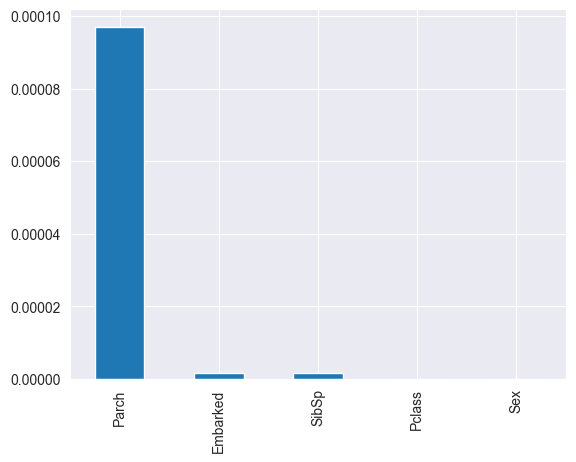

In [38]:
score = []

for feature in titanic.columns[:-1]:
    
    # Create contingency table
    ct = pd.crosstab(titanic['Survived'], titanic[feature])
    
    # chi-test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)
    
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=False).plot(kind='bar')